# 1. Importando as bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

leitura da base de dados

In [22]:
games = pd.read_csv('dadosoficina04.txt')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 2. Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo

Código consultando a base de dados e armazenando em uma variável para gerar o gráfico

In [23]:
global_sales_nintendo = games[games['Publisher'] == 'Nintendo']
generos_nintendo = global_sales_nintendo.groupby(by='Genre').sum()
global_sales_nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


visualizando as 5 primeiras ocorrências

In [24]:
generos_nintendo.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,359543,156516.0,63.49,29.02,29.24,6.48,128.18
Adventure,193705,70161.0,17.72,7.66,9.01,1.28,35.71
Fighting,47056,36031.0,27.10,8.64,14.94,2.65,53.35
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Platform,245890,222146.0,220.14,85.21,102.36,19.47,427.21


# Código para gerar o gráfico de pizza com as informações com base nos dados
Proporção de vendas global de todos os gêneros da Nintendo.

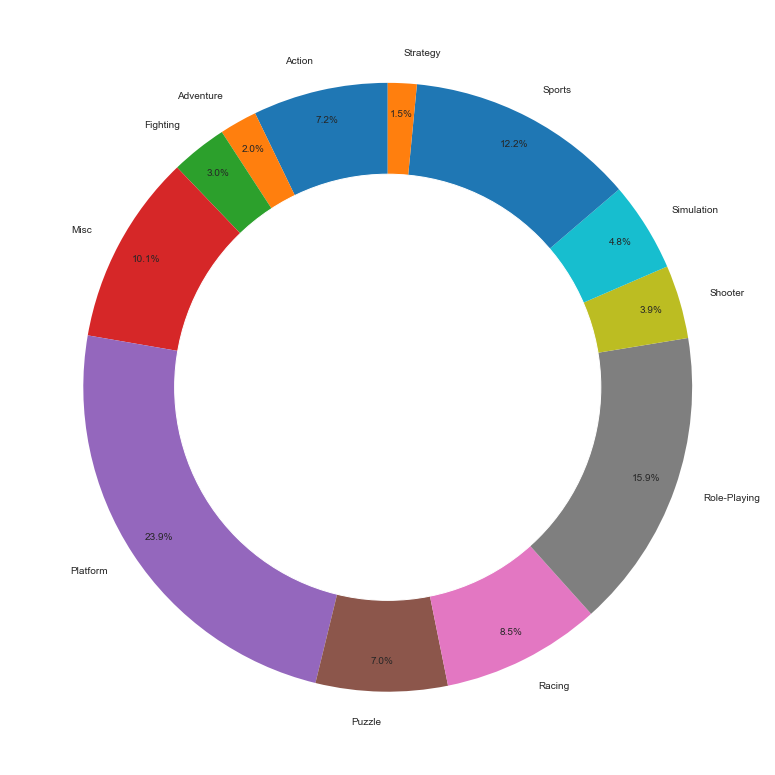

In [25]:
plt.figure(figsize=(14, 14))
plt.pie(x=generos_nintendo['Global_Sales'], labels = generos_nintendo.index, autopct='%1.1f%%',startangle=90, pctdistance=0.90)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Código para gerar o gráfico de barras com as informações com base nos dados
Proporção de vendas global de todos os gêneros da Nintendo.

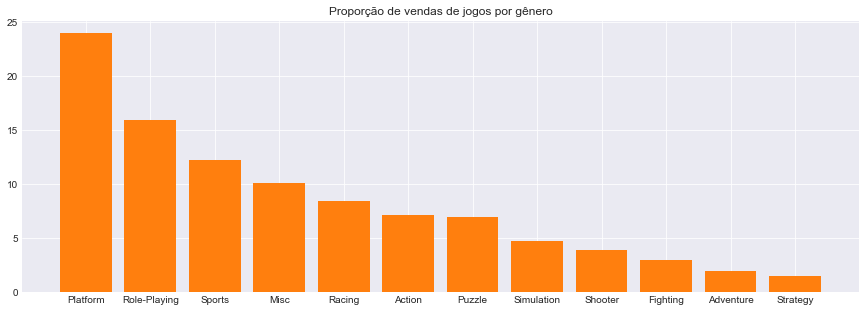

In [26]:
global_nintendo_ordenado = generos_nintendo.sort_values(by='Global_Sales', ascending=False)
porcentagens = global_nintendo_ordenado['Global_Sales']*100.0/global_nintendo_ordenado['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(global_nintendo_ordenado.index, porcentagens, color='C1')
plt.title('Proporção de vendas de jogos por gênero')
plt.show()

# 3. Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015. 

Código consultando a base de dados e armazenando em uma variável para gerar o gráfico

In [27]:
genero_periodo = games.query('Year > 2014')
genero_periodo = genero_periodo.groupby(by='Platform').sum()
genero_periodo

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
3DS,1240523,243850.0,6.65,5.34,20.42,1.11,33.59
DS,5959,2020.0,0.27,0.00,0.00,0.02,0.29
PC,1069198,177358.0,3.04,6.87,0.00,0.72,10.67
PS3,1169252,213622.0,5.16,8.23,4.80,2.57,20.81
PS4,2143749,493784.0,52.62,67.91,10.45,23.59,154.58
PSP,43389,6045.0,0.00,0.00,0.12,0.00,0.12
PSV,2359673,352689.0,0.73,1.58,7.54,0.62,10.52
Wii,34894,8060.0,0.57,0.87,0.00,0.12,1.55
WiiU,317560,76580.0,8.26,5.89,3.96,1.54,19.67


# Código para gerar o gráfico de pizza com as informações com base nos dados
Proporção de vendas por plataforma a partir de 2015.

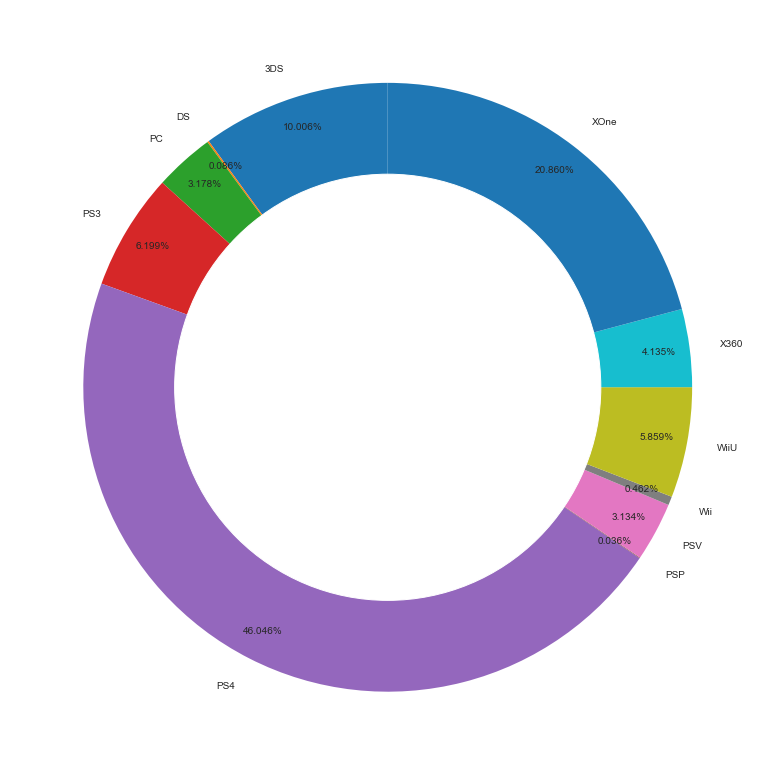

In [28]:
plt.figure(figsize=(14, 14))
plt.pie(x=genero_periodo['Global_Sales'], labels = genero_periodo.index, autopct='%1.3f%%',startangle=90, pctdistance=0.90)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Código para gerar o gráfico de barras com as informações com base nos dados
Proporção de vendas por plataforma a partir de 2015.

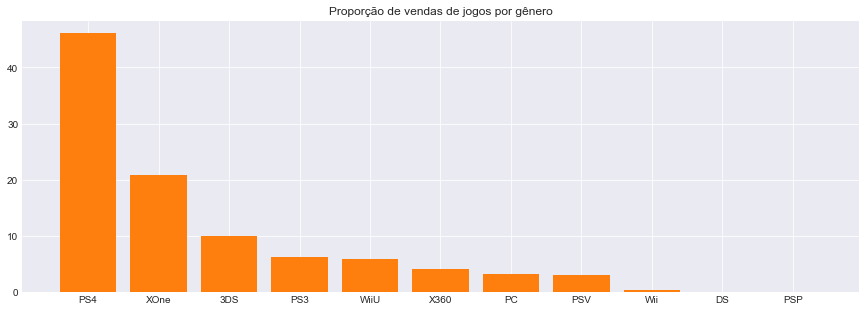

In [29]:
gen_periodo_ordenado = genero_periodo.sort_values(by='Global_Sales', ascending=False)
porcentagens = gen_periodo_ordenado['Global_Sales']*100.0/gen_periodo_ordenado['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(gen_periodo_ordenado.index, porcentagens, color='C1')
plt.title('Proporção de vendas de jogos por gênero')
plt.show()